In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas import plotting
from scipy import stats
import seaborn



data = pd.read_csv('data/GlobalAnxDepDaly.csv')
data

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,...,rei_name,metric_id,metric_name,year,Anxiety,upper,lower,Depression,depupper,deplower
0,2,DALYs (Disability-Adjusted Life Years),160,Afghanistan,3,Both,22,All ages,567,Depressive disorders,...,All risk factors,1,Number,1990,11702.891040,21453.09644,3303.567942,2391.911426,5340.446861,668.783684
1,2,DALYs (Disability-Adjusted Life Years),160,Afghanistan,3,Both,22,All ages,567,Depressive disorders,...,All risk factors,1,Number,1991,12849.168710,23539.29820,3621.941005,2675.709566,6079.764772,738.925264
2,2,DALYs (Disability-Adjusted Life Years),160,Afghanistan,3,Both,22,All ages,567,Depressive disorders,...,All risk factors,1,Number,1992,14792.687830,27198.91552,4190.270030,3144.113758,7150.473692,866.645580
3,2,DALYs (Disability-Adjusted Life Years),160,Afghanistan,3,Both,22,All ages,567,Depressive disorders,...,All risk factors,1,Number,1993,16180.719500,29667.24309,4582.555908,3454.079489,8037.390538,940.995560
4,2,DALYs (Disability-Adjusted Life Years),160,Afghanistan,3,Both,22,All ages,567,Depressive disorders,...,All risk factors,1,Number,1994,16773.485390,30744.66132,4716.844974,3560.195584,8090.198554,944.336324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6145,2,DALYs (Disability-Adjusted Life Years),198,Zimbabwe,3,Both,22,All ages,567,Depressive disorders,...,All risk factors,1,Number,2015,8709.409011,15046.19740,3226.750361,6060.223341,12304.540860,1998.847763
6146,2,DALYs (Disability-Adjusted Life Years),198,Zimbabwe,3,Both,22,All ages,567,Depressive disorders,...,All risk factors,1,Number,2016,8931.736069,15650.37716,3262.577167,6114.102896,12498.358720,2000.736621
6147,2,DALYs (Disability-Adjusted Life Years),198,Zimbabwe,3,Both,22,All ages,567,Depressive disorders,...,All risk factors,1,Number,2017,9168.998740,16043.10196,3400.239936,6165.282492,12682.920620,2001.932992
6148,2,DALYs (Disability-Adjusted Life Years),198,Zimbabwe,3,Both,22,All ages,567,Depressive disorders,...,All risk factors,1,Number,2018,9359.974434,16578.35090,3531.479079,6246.948796,12721.938690,2037.265740


In [2]:
data.shape
print(data.columns)
print(data[['location_name','year','Anxiety']])

Index(['measure_id', 'measure_name', 'location_id', 'location_name', 'sex_id',
       'sex_name', 'age_id', 'age_name', 'cause_id', 'cause_name', 'rei_id',
       'rei_name', 'metric_id', 'metric_name', 'year', 'Anxiety', 'upper',
       'lower', 'Depression', 'depupper', 'deplower'],
      dtype='object')
     location_name  year       Anxiety
0      Afghanistan  1990  11702.891040
1      Afghanistan  1991  12849.168710
2      Afghanistan  1992  14792.687830
3      Afghanistan  1993  16180.719500
4      Afghanistan  1994  16773.485390
...            ...   ...           ...
6145      Zimbabwe  2015   8709.409011
6146      Zimbabwe  2016   8931.736069
6147      Zimbabwe  2017   9168.998740
6148      Zimbabwe  2018   9359.974434
6149      Zimbabwe  2019   9570.516119

[6150 rows x 3 columns]


In [3]:
data.describe()

,measure_id,location_id,sex_id,age_id,cause_id,rei_id,metric_id,year,Anxiety,upper,lower,Depression,depupper,deplower
count,6150.0,6150.000000,6150.0,6150.0,6150.0,6150.0,6150.0,6150.000000,6.150000e+03,6.150000e+03,6.150000e+03,6.150000e+03,6.150000e+03,6150.000000
mean,2.0,135.639024,3.0,22.0,567.0,169.0,1.0,2004.500000,5.209094e+04,8.914253e+04,2.002956e+04,1.654897e+04,3.610020e+04,4813.595585
std,0.0,98.144253,0.0,0.0,0.0,0.0,0.0,8.656145,3.867844e+05,6.579730e+05,1.510894e+05,1.225412e+05,2.652927e+05,36063.939271
min,2.0,1.000000,3.0,22.0,567.0,169.0,1.0,1990.000000,7.310341e-01,1.312986e+00,2.412603e-01,3.526261e-01,7.749915e-01,0.100140
25%,2.0,62.000000,3.0,22.0,567.0,169.0,1.0,1997.000000,9.371730e+02,1.732098e+03,3.270905e+02,2.763564e+02,6.303278e+02,73.919938
50%,2.0,122.000000,3.0,22.0,567.0,169.0,1.0,2004.500000,4.951505e+03,8.601070e+03,1.812190e+03,1.364919e+03,3.127232e+03,376.109400
75%,2.0,182.000000,3.0,22.0,567.0,169.0,1.0,2012.000000,1.526080e+04,2.648742e+04,6.032913e+03,5.629815e+03,1.248204e+04,1669.820673
max,2.0,522.000000,3.0,22.0,567.0,169.0,1.0,2019.000000,6.531846e+06,1.112083e+07,2.543291e+06,2.028261e+06,4.422059e+06,590241.729100


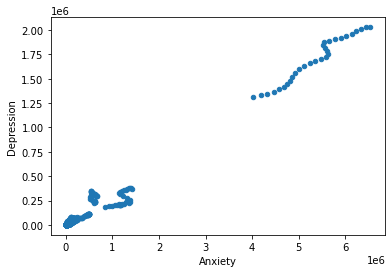

In [4]:
data.plot(kind='scatter', x='Anxiety', y='Depression')
plt.show()

<AxesSubplot:ylabel='Frequency'>

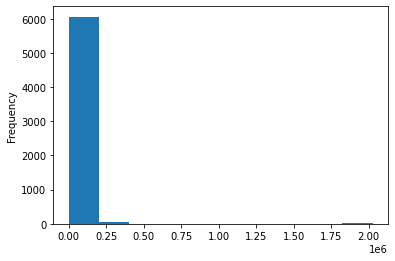

In [5]:
data['Depression'].plot(kind='hist')

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='Anxiety', ylabel='year'>,
        <AxesSubplot:xlabel='Depression', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='Anxiety'>,
        <AxesSubplot:xlabel='Anxiety', ylabel='Anxiety'>,
        <AxesSubplot:xlabel='Depression', ylabel='Anxiety'>],
       [<AxesSubplot:xlabel='year', ylabel='Depression'>,
        <AxesSubplot:xlabel='Anxiety', ylabel='Depression'>,
        <AxesSubplot:xlabel='Depression', ylabel='Depression'>]],
      dtype=object)

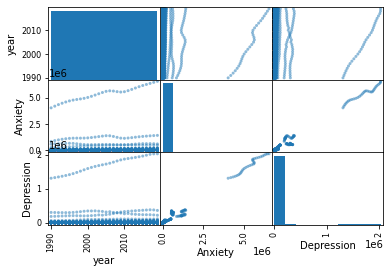

In [6]:
plotting.scatter_matrix(data[['year', 'Anxiety', 'Depression']])

Depressive disorders    AxesSubplot(0.1,0.15;0.8x0.75)
dtype: object

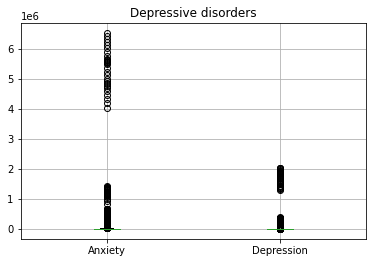

In [7]:
groupby_year = data.groupby('cause_name')
groupby_year.boxplot(column=['Anxiety', 'Depression'])

scipy.stats.ttest_1samp() tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value (see the function’s help):

In [8]:
stats.ttest_1samp(data['Anxiety'], 0)

Ttest_1sampResult(statistic=10.561625740877655, pvalue=7.465261528243995e-26)

We have seen above that the mean val in USA and Canada populations were different. To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind():

In [9]:
usa_loc = data[data['location_name'] == 'United States of America']['Anxiety']
can_loc = data[data['location_name'] == 'Canada']['Anxiety']
stats.ttest_ind(usa_loc, can_loc)

Ttest_indResult(statistic=29.549777297965413, pvalue=1.1725987614943782e-36)

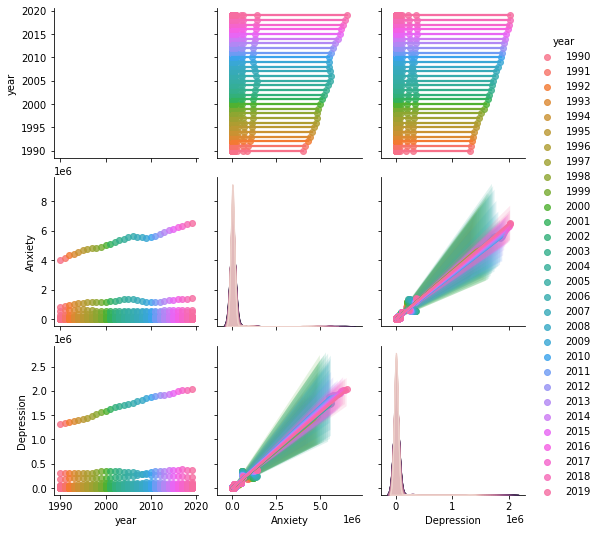

In [12]:
seaborn.pairplot(data, vars=['year', 'Anxiety', 'Depression'],
                 kind='reg', hue='year')  